#  Introduction à l'apprentissage ensembliste

On va introduire l'apprentissage ensembliste (**ensemble learning**) dont le but est d'améliorer les performances de notre modèle en combinant plusieurs classifieurs dits faibles (en termes de **biais** ou **variance** des erreurs de prédiction).

<div>
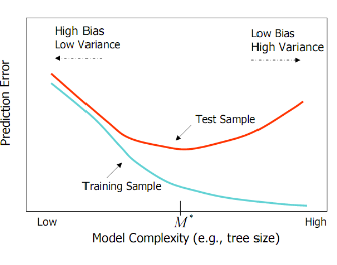
</div>



Dans l'apprentissage ensembliste, on distingue 3 grandes familles de méthodes : le **Bagging** (parallèle), le **Boosting** et le **Stacking** (séquentielles)

Le **Bagging** qui est un diminutif de **B**ootstrap **Agg**regat**ing** (vous allez comprendre ce nom dans un instant) est une méthode permettant de combiner plusieurs classifieurs sur différents échantillons Bootstrap indépendants (tirage avec remise dans la base de départ). La construction des classifieurs est faite de manière parallèle. Cette méthode permet de réduire la variance des estimateurs individuels et offre une prédiction plus performante et plus stable, dépendante du nombre de classifieurs faibles utilisés. 

<div>
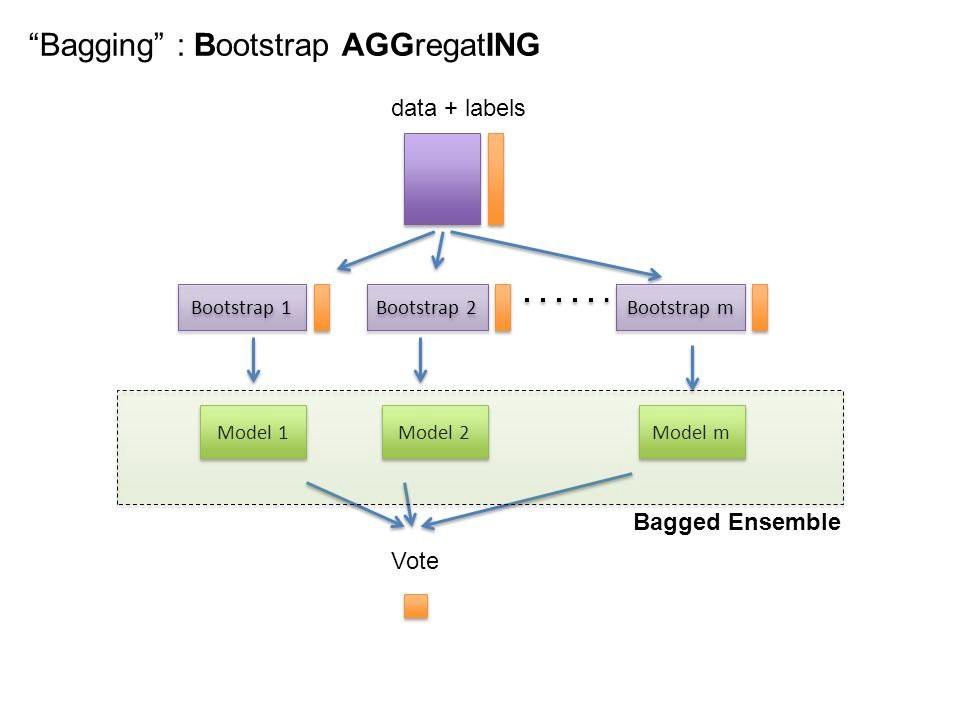
</div>

Le **Boosting** consiste à combiner plusieurs classifieurs en accordant plus de poids à ceux dont la prédiction est correcte. Le Boosting procède séquentiellement. Chaque classifieur est une version adaptative du précédent en donnant plus de poids aux observations mal ajustées ou mal prédites. L’estimateur construit à l’étape k concentrera donc ses efforts sur les observations mal ajustées par l’estimateur à l’étape k−1.Cette méthode permet de réduire le biais des estimateurs individuels.**AdaBoost** est l'algorithme de Boosting le plus populaire. 

- **Algorithme AdaBoost**
<div>
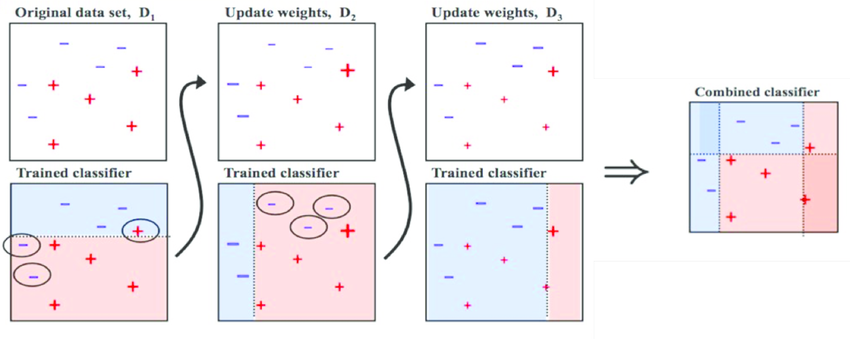
</div>

<div>
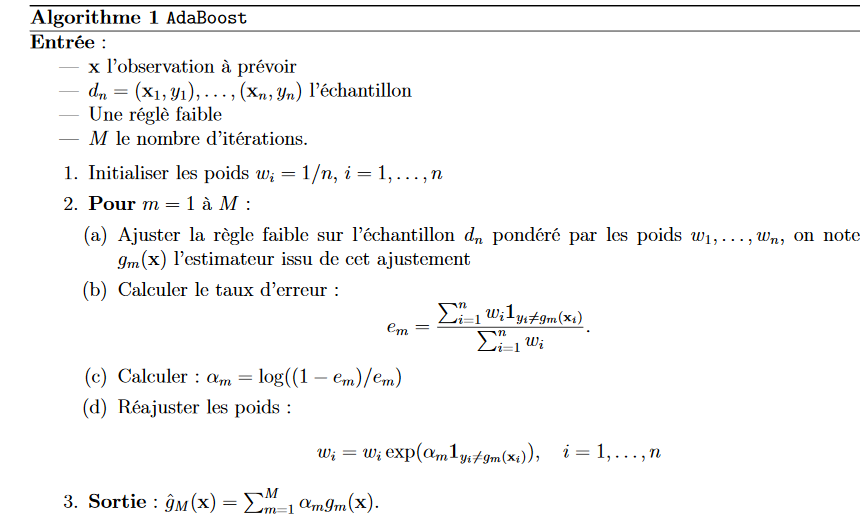
</div>

Le **stacking** est un procédé qui consiste à appliquer un algorithme de machine learning à des classifieur générés par un autre algorithme de machine learning.Il s’agit de prédire quels sont les meilleurs classifieurs et de les pondérer. 

<div>
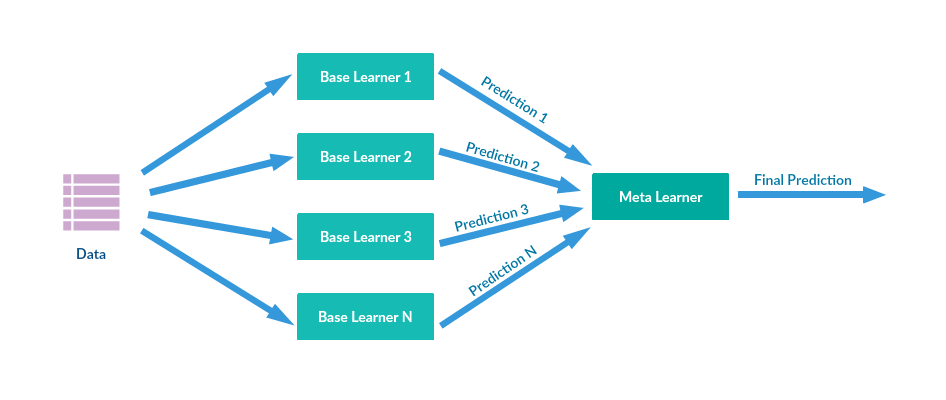
</div>

On peut également citer les **Random Forests** comme autre méthode ensembliste.Ils sont une **amélioration du Bagging** puisqu'elles créent des arbres plus différents structurellement en échantillonnant aléatoirement seulement un sous-ensemble des features disponibles, ce qui permet de réduire la corrélation entre les arbres et donc d'obtenir un meilleur modèle final.

<div>
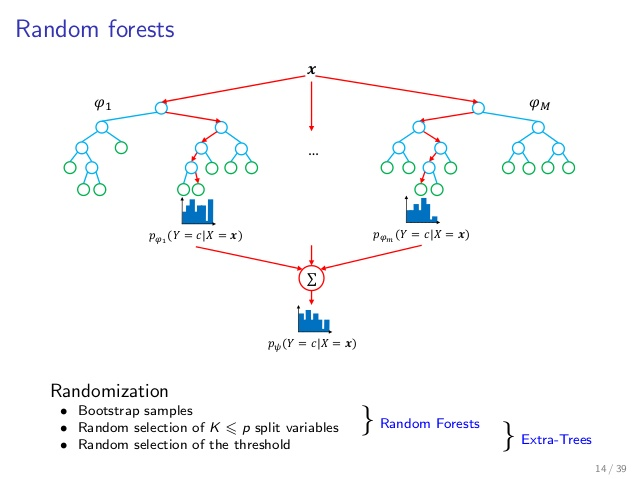
</div>

L'agrégation des modèles ensembliste se fait par **vote majoritaire** parmi les prédictions pour les problèmes de classification et par **moyennisation** (pondérée ou non) des prédictions pour des problèmes de régression.

Nous allons mettre en pratique les méthodes ensemblistes (Bagging,AdaBoost,Random Forest) sur le dataset **PIMA INDIAN DIABETES**. 


Les données disponibles sont les suivantes :

Pregnancies = Number of times pregnant

Glucose = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure  = Diastolic blood pressure (mm Hg)

SkinThickness = Triceps skin fold thickness (mm)

Insulin = 2-Hour serum insulin (mu U/ml)

BMI = Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction = Diabetes pedigree function

Age  = Age (years)

Outcome = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)




### 1. Import des libraries utiles

In [1]:
#Analyse exploratoire des données et Preprocessing
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

### 2. Description du dataset
1. Charger le dataset et afficher sa dimension

2. Afficher les 10 premières lignes de la table

3. Afficher la liste des variables et leurs types


In [3]:
# Charger le dataset et afficher sa dimension
diabet = pd.read_csv('data/diabetes.csv')
diabet.shape

(768, 9)

In [4]:
diabet.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 ### 3. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable


In [6]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 ### 4. Analyse exploratoire 
 
 1. Afficher le `distplot`de la variable `Glucose`. Commenter
 2. Afficher le `distplot` de la variable `DiabetesPedigreeFunction`. Commenter
 3. Afficher le `Boxplot`de la variable `Insulin`en fonction de la variable cible `Outcome`
 4. Afficher les `Boxplot` des variables `BMI` et `Age` en fonction de la variable cible `Outcome`
 5. Afficher le `pairplot`de l'ensemble des variables `BloodPressure`et `BMI`en fonction de la variable `Outcome`.Commenter
 6. Afficher la HeatMap des corrélations de l'ensemble des variables (hors variable cible). Commenter
 
 **Bonus:** Afficher le `kdeplot`de l'ensemble des variables en fonction de la variable cible. Commenter
 
 

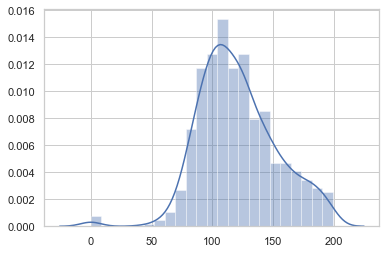

In [133]:
# Afficher le distplotde la variable Glucose. Commenter
sns.distplot(diabet[['Glucose']])
# Pic sur l'abscisse autour de 100

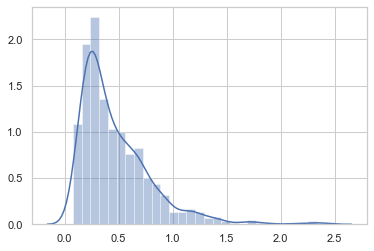

In [134]:
# Afficher le distplot de la variable DiabetesPedigreeFunction. Commenter
sns.distplot(diabet[['DiabetesPedigreeFunction']])
# Pic sur l'abscisse autour de 0.25

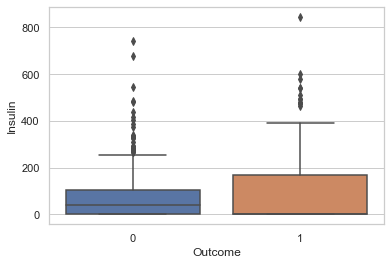

In [136]:
# Afficher le Boxplotde la variable Insulinen fonction de la variable cible Outcome
ax = sns.boxplot(x=diabet["Outcome"], y=diabet['Insulin'])

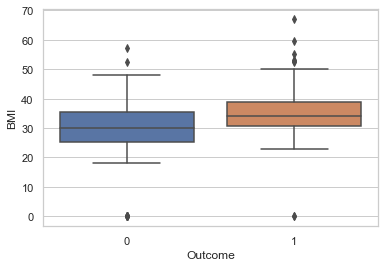

In [16]:
#Afficher les Boxplot des variables BMI et Age en fonction de la variable cible Outcome
ax = sns.boxplot(x="Outcome", y='BMI',data=diabet)

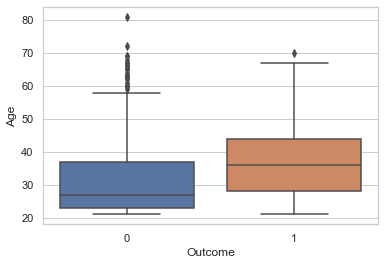

In [18]:
ax = sns.boxplot(x="Outcome", y='Age',data=diabet)

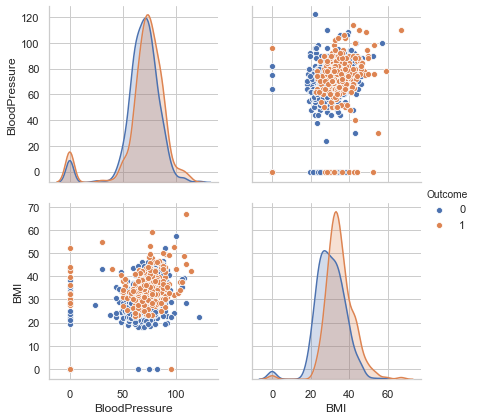

In [138]:
# Afficher le pairplot de l'ensemble des variables BloodPressure et BMI en fonction de la variable Outcome.Commenter
sns.pairplot(diabet, height=3, vars=['BloodPressure',  'BMI'], hue='Outcome')

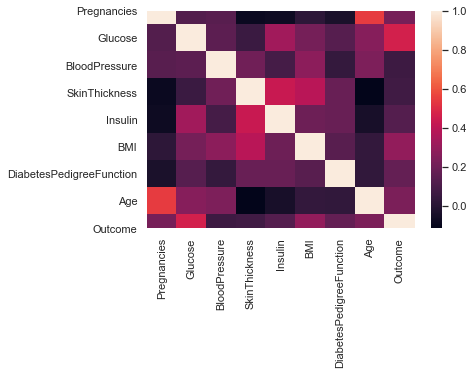

In [139]:
# Afficher la HeatMap des corrélations de l'ensemble des variables (hors variable cible). Commenter
sns.heatmap(diabet.corr())

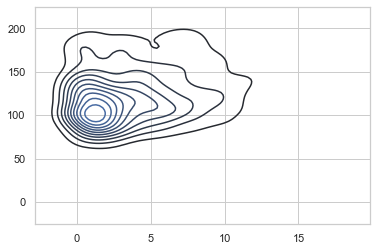

In [141]:
#  Afficher le kdeplot de l'ensemble des variables en fonction de la variable cible. Commenter
sns.kdeplot(diabet,diabet['Outcome'])

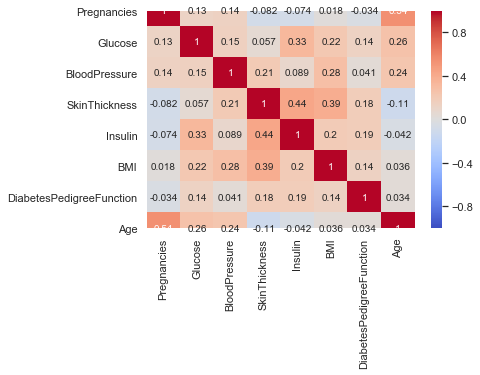

In [143]:
sns.heatmap(diabet.iloc[:,:-1].corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
 

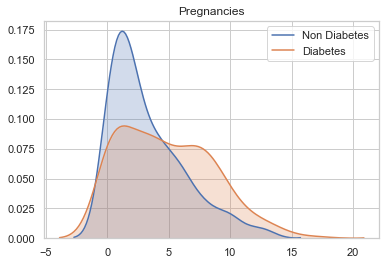

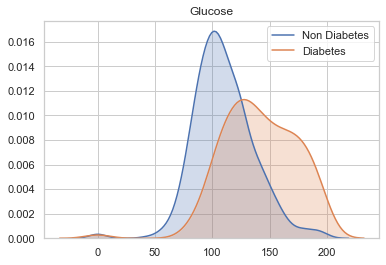

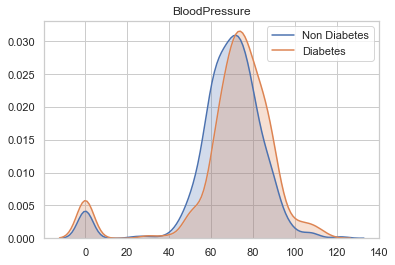

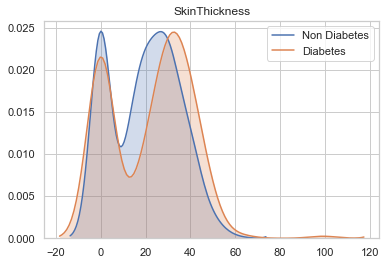

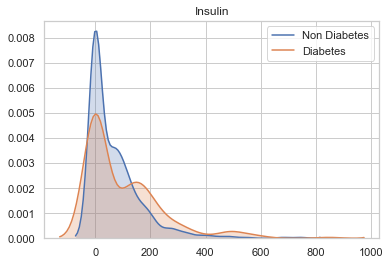

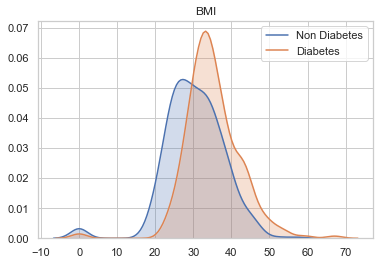

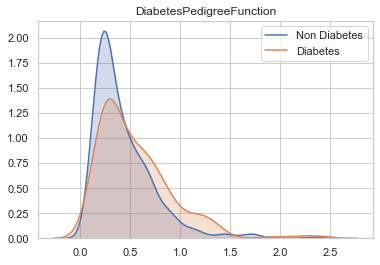

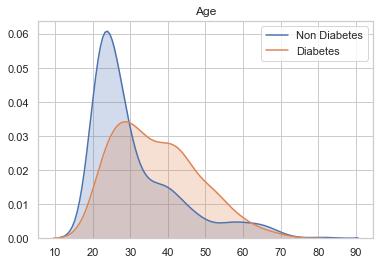

In [145]:
for col in diabet.iloc[:,:-1].columns:
    sns.kdeplot(diabet.loc[diabet['Outcome']== 0,col], shade=True,label = "Non Diabetes")
    sns.kdeplot(diabet.loc[diabet['Outcome']== 1,col], shade=True,label = "Diabetes")
    plt.title(col)
    plt.show()

 ### 5. Data splitting
 
 1. Créer un DataFrame `X` contenant les features et `y` la Target
 2. Générer les échantillons d'apprentissage (training) et de test à l'aide de `sklearn.model_selection.train_test_split` en fixant le test_size à 0.33 et random_state à 42 et stratify = y 

3. Àfficher le tableau de fréquence de la variable `y` (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 

In [154]:
# Créer un DataFrame X contenant les features et y la Target
X = diabet.drop('Outcome', axis=1)
y = diabet.Outcome

In [155]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify = y)

In [146]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [42]:
# Afficher le tableau de fréquence de la variable y (en nombre et pourcentage) pour les 2 échantillons générés. Commenter 
print(pd.crosstab(diabet['Insulin'],diabet['Outcome']))

Outcome    0    1
Insulin          
0        236  138
14         0    1
15         1    0
16         1    0
18         2    0
...      ...  ...
579        0    1
600        0    1
680        1    0
744        1    0
846        0    1

[186 rows x 2 columns]


 ### 6. Bagging - Modélisation et Performances

Nous allons à ce stade entraîner un **modèle Bagging** en utilisant la fonction `sklearn.ensemble.BaggingClassifier`

1. Afficher la DocString de cette fonction

2. On paramètre la fonction avec  `tree.DecisionTreeClassifier(random_state=1)`. Quelle est sa signification?

3. Instancier un `BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test.

5. Afficher la `heatmap` de la matrice de confusion (fonction `sklearn.metrics.confusion_matrix`) et l'Accuracy. Commenter

6. Définir l'AUC et l'afficher
   
7. Définir la courbe ROC
   Afficher la courbe ROC. Interpréter

In [156]:
from sklearn.ensemble import BaggingClassifier
# Afficher la DocString de cette fonction
help(BaggingClassifier)

Help on class BaggingClassifier in module sklearn.ensemble._bagging:

class BaggingClassifier(sklearn.base.ClassifierMixin, BaseBagging)
 |  BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
 |  
 |  A Bagging classifier.
 |  
 |  A Bagging classifier is an ensemble meta-estimator that fits base
 |  classifiers each on random subsets of the original dataset and then
 |  aggregate their individual predictions (either by voting or by averaging)
 |  to form a final prediction. Such a meta-estimator can typically be used as
 |  a way to reduce the variance of a black-box estimator (e.g., a decision
 |  tree), by introducing randomization into its construction procedure and
 |  then making an ensemble out of it.
 |  
 |  This algorithm encompasses several works from the literature. When random
 |  subsets of the dataset are drawn as

In [157]:
# On paramètre la fonction avec tree.DecisionTreeClassifier(random_state=1). Quelle est sa signification?
from sklearn.tree import DecisionTreeClassifier
bag = BaggingClassifier(base_estimator= DecisionTreeClassifier())

In [159]:
# Instancier un BaggingClassifier(tree.DecisionTreeClassifier(random_state=1)) et appliquer le (fonction .fit()) sur votre échantillon d'apprentissage
bag = BaggingClassifier(base_estimator= DecisionTreeClassifier()).fit(X_train,y_train)

In [160]:
# Faire une prédiction (fonction .predict()) de la variable Y sur l'échantillon de test.
y_pred_bag = bag.predict(X_test)

In [161]:
# Afficher la heatmap de la matrice de confusion (fonction sklearn.metrics.confusion_matrix) et l'Accuracy. Commenter
from sklearn.metrics import confusion_matrix
confusion_matrix( y_test,y_pred_bag)

array([[146,  19],
       [ 41,  48]], dtype=int64)

In [162]:
# Définir l'AUC et l'afficher
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_bag)
auc_bag =  auc(fpr, tpr)

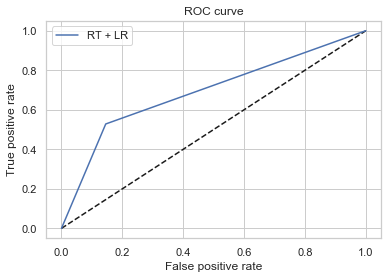

In [125]:
 # Définir la courbe ROC Afficher la courbe ROC. Interpréter
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [126]:
accuracy_bag = metrics.accuracy_score(y_test,y_pred_bag)

 ### 7. AdaBoost - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle AdaBoost** en utilisant la fonction `sklearn.ensemble.AdaBoostClassifier`

1. Afficher la DocString de cette fonction
2. Instancier un `AdaBoostClassifier(random_state=1)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

3. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

4. Afficher l'Accuracy, l'AUC et la courbe ROC

In [147]:
# Afficher la DocString de cette fonction
from sklearn.ensemble import AdaBoostClassifier
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, optional (default=None)
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting 

In [148]:
# Instancier un AdaBoostClassifier(random_state=1) et appliquer le (fonction .fit()) sur votre échantillon d'apprentissage
ada = AdaBoostClassifier(random_state=1).fit(X_train,y_train)

In [149]:
# Faire une prédiction (fonction .predict()) de la variable Y sur l'échantillon de test. 
y_pred_ada = ada.predict(X_test)

In [150]:
# Afficher l'Accuracy, l'AUC et la courbe ROC
accuracy_ada = metrics.accuracy_score(y_test,y_pred_ada)

In [151]:
# Définir l'AUC et l'afficher
from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ada)
auc_ada = auc(fpr, tpr)


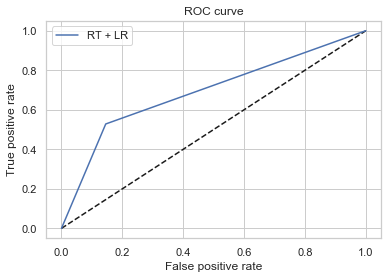

In [83]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

 ### 8. Random Forest - Modélisation et Performances

Nous allons à cette stade entraîner un **modèle RANDOM FOREST** en utilisant la fonction `sklearn.ensemble.RandomForestClassifier`

1. Afficher la DocString de cette fonction
2. On choisit n_estimators=1000. Quelle est sa signification?
3. Instancier un `RandomForestClassifier(n_estimators=1000)` et appliquer le (fonction `.fit()`) sur votre échantillon d'apprentissage

4. Faire une prédiction (fonction `.predict()`) de la variable Y sur l'échantillon de test. 

5. Afficher l'Accuracy, l'AUC et la courbe ROC

6. Afficher l'importance de chaque variable dans le RF avec `rf.feature_importances_`. Associer à chaque niveau le nom de la variable associée (dans l'ordre des variables disponibles dans le dataset).
   Afficher le `barplot` de l'importance par variable. Commenter
   
**Bonus** : Exclure les 2 variables les moins importantes (`SkinThickness`et `Insulin`) et relancer le modèle. Comparer l'AUC à celui du modèle incluant l'ensemble des variables
**Bonus**: Rechercher les hyperparamètres optimaux de la RF par GridSearch puis relancer le modèle RF et calculer l'AUC. Commenter les résultats par comparaison avec les précédents modèles

```
param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
```

In [1]:
# Afficher la DocString de cette fonction
from sklearn.ensemble import RandomForestClassifier


In [87]:
# On choisit n_estimators=1000. Quelle est sa signification?
RandomForestClassifier(n_estimators=1000)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
# Instancier un RandomForestClassifier(n_estimators=1000) et appliquer le (fonction .fit()) sur votre échantillon d'apprentissage
rdf = RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)

In [116]:
# Faire une prédiction (fonction .predict()) de la variable Y sur l'échantillon de test. 
y_pred_rdf = rdf.predict(X_test)

In [117]:
# Afficher l'Accuracy, l'AUC et la courbe ROC
accuracy_rdf = metrics.accuracy_score(y_test,y_pred_rdf)

In [118]:
# Afficher l'importance de chaque variable dans le RF avec rf.feature_importances_. Associer à chaque niveau le nom de la variable associée (dans l'ordre des variables disponibles dans le dataset). Afficher le barplot de l'importance par variable. Commenter

from sklearn import metrics 
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rdf)
auc_rdf = auc(fpr, tpr)


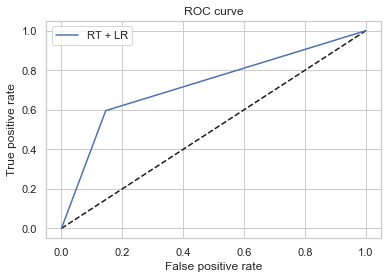

In [94]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

 ### 9. Comparaison des performances
 1. Regrouper dans un DataFrame les Accuracy et AUC par modèle (créer au préalable un Dictionnaire)
 2. Superposer les courbes ROC. Commenter les résultats

In [152]:
dict_models = {'AUC':[auc_bag,auc_ada,auc_rdf],'Accuracy':[accuracy_bag,accuracy_ada,accuracy_rdf]}
df = pd.DataFrame(dict_models)

In [163]:
df.index = ['Bagging','AdaBoosting','RandomForestTree']
df

,AUC,Accuracy
Bagging,0.691318,0.720472
AdaBoosting,0.691318,0.740157
RandomForestTree,0.725026,0.763780
